# 23-24 测试的基本规则和流程
我们已经学习完涉及Go语言所有的内建数据类型，以及特色的流程和语句。
理论上说我们已经完全可以独立编写各种各样的go程序了，如果有遗忘回到之前的文章复习一下就行。

接下来我们主要学习go语言编程进阶，掌握附加知识比如：Go程序测试，程序监测，以及Go语言标准库中各种常用代码包的正确使用方法。

对于程序和软件来讲，尽早发现问题以及修正问题其实非常重要。对于优秀的程序和软件来说，测试必然是非常受重视的一个环节，所以我们最好利用测试来为程序建起堡垒。

对于程序或软件的测试也分很多种，比如：单元测试、API测试、集成测试、灰度测试，等等。我在本模块会主要针对单元测试进行讲解。

# 前导内容：go程序测试基础知识
## 单元测试
单元测试又称程序员测试，顾名思义这就是程序员们本来应该做的自我检查工作之一。
Go语言的创造者们非常重视程序测试，为Go程序开发者们提供了丰富的API和工具。利用这些工具，我们可以创建测试源码文件，并为明亮源码文件和库源码文件中的程序实体编写测试用例。

在Go语言中，一个测试用例往往会由一个或多个测试函数来代表，不过在大多数情况下，每个测试用例仅用一个测试函数就足够了。测试函数往往用于描述和保障某个程序实体的某方面功能，比如，该功能在正常情况下会因什么样的输入，产生什么样的输出，又比如，该功能会在什么情况下报错或表现异常，等等。

我们可以为Go程序编写三类测试，即：功能测试（test）、基准测试（benchmark，也称性能测试），以及示例测试（example）。

对于前两类测试，从名称上你就应该可以猜到它们的用途。而示例测试严格来讲也是一种功能测试，只不过它更关注程序打印出来的内容。

一般情况下，一个测试源码文件只会针对于某个命令源码文件，或库源码文件（以下简称被测源码文件）做测试，所以我们总会（并且应该）把它们放在同一个代码包内。

测试源码文件的主名称应该以被测源码文件的主名称为前导，并且必须以“_test”为后缀。例如，如果被测源码文件的名称为demo52.go，那么针对它的测试源码文件的名称就应该是demo52_test.go。

每个测试源码文件都必须至少包含一个测试函数。并且，从语法上讲，每个测试源码文件中，都可以包含用来做任何一类测试的测试函数，即使把这三类测试函数都塞进去也没有问题。我通常就是这么做的，只要把控好测试函数的分组和数量就可以了。

我们可以依据这些测试函数针对的不同程序实体，把它们分成不同的**逻辑组**，并且，利用注释以及帮助类的变量或函数来做分割。同时，我们还可以依据被测源码文件中程序实体的先后顺序，来安排测试源码文件中测试函数的顺序。

此外，不仅仅对测试源码文件的名称，对于测试函数的名称和签名，Go语言也是有明文规定的。你知道这个规定的内容吗？---不知道:)

所以，我们今天的问题就是：Go语言对测试函数的名称和签名都有哪些规定？

这里我给出的典型回答是下面三个内容。

- 对于功能测试函数来说，其名称必须以Test为前缀，并且参数列表中只应有一个*testing.T类型的参数声明。
- 对于性能测试函数来说，其名称必须以Benchmark为前缀，并且唯一参数的类型必须是*testing.B类型的。
- 对于示例测试函数来说，其名称必须以Example为前缀，但对函数的参数列表没有强制规定。

# 问题解析：
我问这个问题的目的一般有两个。

- 第一个目的当然是考察Go程序测试的基本规则。如果你经常编写测试源码文件，那么这道题应该是很容易回答的。

- 第二个目的是作为一个引子，引出第二个问题，即：go test命令执行的主要测试流程是什么？不过在这里我就不问你了，我直接说一下答案。

我们首先需要记住一点，只有测试源码文件的名称对了，测试函数的名称和签名也对了，当我们运行`go test`命令的时候，其中的测试代码才有可能被运行。

`go test`命令在开始运行时，会先做一些准备工作，比如，确定内部需要用到的命令，检查我们指定的代码包或源码文件的有效性，以及判断我们给予的标记是否合法，等等。

在准备工作顺利完成之后，`go test`命令就会针对每个被测代码包，依次地进行构建、执行包中符合要求的测试函数，清理临时文件，打印测试结果。这就是通常情况下的主要测试流程。

请注意上述的“依次”二字。对于每个被测代码包，`go test`命令会串行地执行测试流程中的每个步骤。

但是，为了加快测试速度，它通常会并发地对多个被测代码包进行功能测试，只不过，在最后打印测试结果的时候，它会依照我们给定的顺序逐个进行，这会让我们感觉到它是在完全串行地执行测试流程。

另一方面，由于并发的测试会让性能测试的结果存在偏差，所以性能测试一般都是串行进行的。更具体地说，只有在所有构建步骤都做完之后，`go test`命令才会真正地开始进行性能测试。

并且，下一个代码包性能测试的进行，总会等到上一个代码包性能测试的结果打印完成才会开始，而且性能测试函数的执行也都会是串行的。

一旦清楚了Go程序测试的具体过程，我们的一些疑惑就自然有了答案。比如，那个名叫`testIntroduce`的测试函数为什么没执行，又比如，为什么即使是简单的性能测试执行起来也会比功能测试慢，等等。

In [1]:
package main

import (
	"errors"
	"flag"
	"fmt"
)

var name string

func init() {
	flag.StringVar(&name, "name", "everyone", "The greeting object.")
}

func main() {
	flag.Parse()
	greeting, err := hello(name)
	if err != nil {
		fmt.Printf("error: %s\n", err)
		return
	}
	fmt.Println(greeting, introduce())
}

// hello 用于生成问候内容。
func hello(name string) (string, error) {
	if name == "" {
		return "", errors.New("empty name")
	}
	return fmt.Sprintf("Hello, %s!", name), nil
}

// introduce 用于生成介绍内容。
func introduce() string {
	return "Welcome to my Golang column."
}


Hello, everyone! Welcome to my Golang column.


In [ ]:
package main

import (
	"fmt"
	"testing"
)

func TestHello(t *testing.T) {
	//测试用例1：name为空字符串
	var name string
	greeting, err := hello(name)
	if err == nil {
		t.Errorf("The error is nil, but it should not be. (name=%q)",
			name)
	}
	if greeting != "" {
		t.Errorf("Nonempty greeting, but it should not be. (name=%q)",
			name)
	}
	//测试用例2：name为非空字符串
	name = "Robert"
	greeting, err = hello(name)
	if err != nil {
		t.Errorf("The error is not nil, but it should be. (name=%q)",
			name)
	}
	if greeting == "" {
		t.Errorf("Empty greeting, but it should not be. (name=%q)",
			name)
	}
	expected := fmt.Sprintf("Hello, %s!", name)
	if greeting != expected {
		t.Errorf("The actual greeting %q is not the expected. (name=%q)",
			greeting, name)
	}
	t.Logf("The expected greeting is %q.\n", expected)
}

func TestIntroduce(t *testing.T) { // 请注意这个测试函数的名称。
	intro := introduce()
	expected := "Welcome to my Golang column."
	if intro != expected {
		t.Errorf("The actual introduce %q is not the expected.",
			intro)
	}
	t.Logf("The expected introduce is %q.\n", expected)
}


# 总结
在本篇文章的一开始，我就试图向你阐释程序测试的重要性。在我经历的公司中起码有一半都不重视程序测试，或者说没有精力去做程序测试。

尤其是中小型的公司，他们往往完全依靠软件质量保障团队，甚至真正的用户去帮他们测试。在这些情况下，软件错误或缺陷的发现、反馈和修复的周期通常会很长，成本也会很大，也许还会造成很不好的影响。

Go语言是一门很重视程序测试的编程语言，它不但自带了testing包，还有专用于程序测试的命令go test。我们要想真正用好一个工具，就需要先了解它的核心逻辑。所以，我今天问你的第一个问题就是关于go test命令的基本规则和主要流程的。在知道这些之后，也许你对Go程序测试就会进入更深层次的了解。

# 思考题
除了本文中提到的，你还知道或用过testing.T类型和testing.B类型的哪些方法？它们都是做什么用的？你可以给我留言，我们一起讨论。

# 知识扩展
## 问题一：怎样解释功能测试的测试结果？
$ go test puzzlers/article20/q2
ok   puzzlers/article20/q2 0.008s
最左边的ok表示此次测试成功，也就是说没有发现测试结果不如预期的情况，这种情况由我们编写的测试代码决定。在测试结果中间，显示的是被测代码包的导入路径，最右边展示的是对该代码包测试所花费的时间，此处显示的是0.008s，如果我们第二次运行的话，得到的结果将是`ok   puzzlers/article20/q2 (cached)`因为测试代码和被测代码都没有任何变动，所以go test命令直接把之前缓存测试成功的结果打印出来了。

go命令通常会缓存程序构建的结果，以便于在将来的构建中重用。我们可以用`go env GOCACHE`命令来查看缓存目录的路径。缓存的路径总是能正确地反映出当时的各种源码文件,构建环境，编译器选项等等真实情况。

一旦有任何变动，缓存数据就会失效，go命令就会再次真正地执行操作。所以我们并不用担心打印出的缓存数据不是实时的结果。go命令会定期地删除最近未使用的缓存数据，但是，如果你想手动删除所有的缓存数据，运行一下go clean -cache命令就好了。

对于测试成功的结果，go命令也是会缓存的。运行go clean -testcache将会删除所有的测试结果缓存。不过，这样做肯定不会删除任何构建结果缓存。

此外，设置环境变量GODEBUG的值也可以稍稍地改变go命令的缓存行为。比如，设置值为gocacheverify=1将会导致go命令绕过任何的缓存数据，而真正地执行操作并重新生成所有结果，然后再去检查新的结果与现有的缓存数据是否一致。

**总之，我们并不用在意缓存数据的存在，因为它们肯定不会妨碍go test命令打印正确的测试结果。**

你可能会问，如果测试失败，命令打印的结果将会是怎样的？如果功能测试函数的那个唯一参数被命名为t，那么当我们在其中调用t.Fail方法时，虽然当前的测试函数会继续执行下去，但是结果会显示该测试失败。如下所示：
$ go test puzzlers/article20/q2
--- FAIL: TestFail (0.00s)
 demo53_test.go:49: Failed.
FAIL
FAIL puzzlers/article20/q2 0.007s

我们运行的命令与之前是相同的，但是我新增了一个功能测试函数TestFail，并在其中调用了t.Fail方法。测试结果显示，对被测代码包的测试，由于TestFail函数的测试失败而宣告失败。

注意，对于失败测试的结果，go test命令并不会进行缓存，所以，这种情况下的每次测试都会产生全新的结果。另外，如果测试失败了，那么go test命令将会导致：失败的测试函数中的常规测试日志一并被打印出来。

在这里的测试结果中，之所以显示了“demo53_test.go:49: Failed.”这一行，是因为我在TestFail函数中的调用表达式t.Fail()的下边编写了代码t.Log("Failed.")。

t.Log方法以及t.Logf方法的作用，就是打印常规的测试日志，只不过当测试成功的时候，go test命令就不会打印这类日志了。如果你想在测试结果中看到所有的常规测试日志，那么可以在运行go test命令的时候加入标记-v。

若我们想让某个测试函数在执行的过程中立即失败，则可以在该函数中调用t.FailNow方法。

我在下面把TestFail函数中的t.Fail()改为t.FailNow()。

与t.Fail()不同，在t.FailNow()执行之后，当前函数会立即终止执行。换句话说，该行代码之后的所有代码都会失去执行机会。在这样修改之后，我再次运行上面的命令，得到的结果如下：
--- FAIL: TestFail (0.00s)
FAIL
FAIL puzzlers/article20/q2 0.008s
显然，之前显示在结果中的常规测试日志并没有出现在这里。

顺便说一下，如果你想在测试失败的同时打印失败测试日志，那么可以直接调用t.Error方法或者t.Errorf方法。

前者相当于t.Log方法和t.Fail方法的连续调用，而后者也与之类似，只不过它相当于先调用了t.Logf方法。

除此之外，还有t.Fatal方法和t.Fatalf方法，它们的作用是在打印失败错误日志之后立即终止当前测试函数的执行并宣告测试失败。更具体地说，这相当于它们在最后都调用了t.FailNow方法。

好了，到此为止，你是不是已经会解读功能测试的测试结果了呢？

## 问题二：怎样解释性能测试的测试结果？
性能测试与功能测试的结果格式有很多相似的地方。我们在这里仅关注前者的特殊之处。请看下面的打印结果。

$ go test -bench=. -run=^$ puzzlers/article20/q3
goos: darwin
goarch: amd64
pkg: puzzlers/article20/q3
BenchmarkGetPrimes-8      500000       2314 ns/op
PASS
ok   puzzlers/article20/q3 1.192s

我在运行`go test`命令的时候加了两个标记。第一个标记及其值为`-bench=.`，只有有了这个标记，命令才会进行性能测试。该标记的值`.`表明需要执行任意名称的性能测试函数，当然了，函数名称还是要符合Go程序测试的基本规则的。

第二个标记及其值是`-run=^$`，这个标记用于表明需要执行哪些功能测试函数，这同样也是以函数名称为依据的。该标记的值`^$`意味着：只执行名称为空的功能测试函数，换句话说，不执行任何功能测试函数。

你可能已经看出来了，这两个标记的值都是正则表达式。实际上，它们只能以正则表达式为值。此外，如果运行`go test`命令的时候不加`-run`标记，那么就会使它执行被测代码包中的所有功能测试函数。

再来看测试结果，重点说一下倒数第三行的内容。`BenchmarkGetPrimes-8`被称为单个性能测试的名称，它表示命令执行了性能测试函数`BenchmarkGetPrimes`，并且当时所用的最大P数量为8。

最大P数量相当于可以**同时运行goroutine的逻辑CPU的最大个数**。这里的逻辑CPU，也可以被称为CPU核心，但它并不等同于计算机中真正的CPU核心，只是Go语言运行时系统内部的一个概念，代表着它同时运行goroutine的能力。

顺便说一句，一台计算机的CPU核心的个数，意味着它能在同一时刻执行多少条程序指令，代表着它并行处理程序指令的能力。

我们可以通过调用 `runtime.GOMAXPROCS`函数改变最大P数量，也可以在运行go test命令时，加入标记-cpu来设置一个最大P数量的列表，以供命令在多次测试时使用。

至于怎样使用这个标记，以及`go test`命令执行的测试流程，会因此做出怎样的改变，我们在下一篇文章中再讨论。

在性能测试名称右边的是，go test命令最后一次执行性能测试函数（即BenchmarkGetPrimes函数）的时候，被测函数（即GetPrimes函数）被执行的实际次数。这是什么意思呢？

`go test`命令在执行性能测试函数的时候会给它一个正整数，若该测试函数的唯一参数的名称为b，则该正整数就由b.N代表。我们应该在测试函数中配合着编写代码，比如：
for i := 0; i < b.N; i++ {
 GetPrimes(1000)
}

我在一个会迭代`b.N`次的循环中调用了`GetPrimes`函数，并给予它参数值`1000`。`go test`命令会先尝试把`b.N`设置为`1`，然后执行测试函数。

如果测试函数的执行时间没有超过上限，此上限默认为1秒，那么命令就会改大`b.N`的值，然后再次执行测试函数，如此往复，直到这个时间大于或等于上限为止。

当某次执行的时间大于或等于上限时，我们就说这是命令此次对该测试函数的最后一次执行。这时的`b.N`的值就会被包含在测试结果中，也就是上述测试结果中的`500000`。

我们可以简称该值为执行次数，但要注意，它指的是**被测函数的执行次数**，而不是性能测试函数的执行次数。

最后再看这个执行次数的右边，2314 ns/op表明单次执行GetPrimes函数的平均耗时为2314纳秒。这其实就是通过将最后一次执行测试函数时的执行时间，除以（被测函数的）执行次数而得出的。
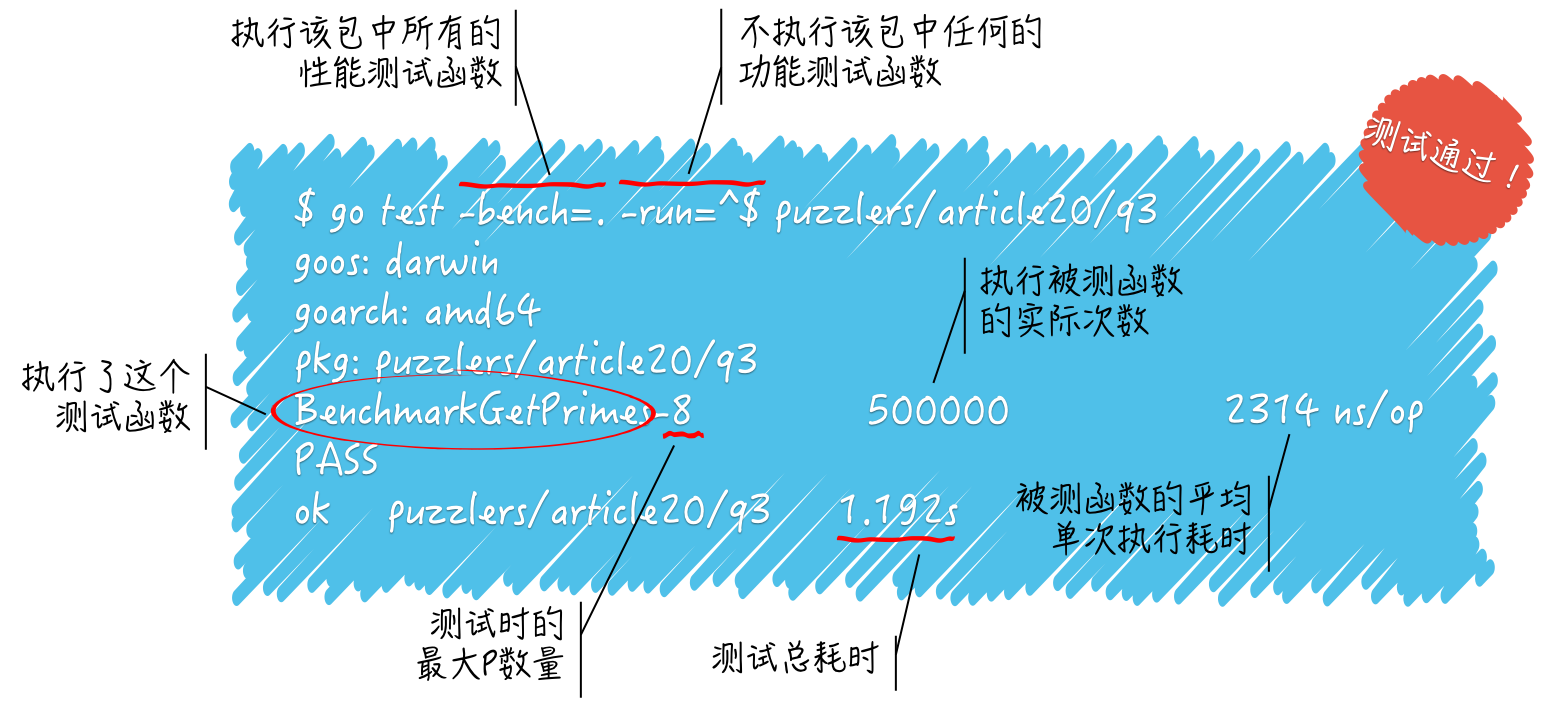
上图是性能测试的基本解读

# 总结
注意，对于功能测试和性能测试，命令执行测试流程的方式会有些不同。另外一个重要的问题是，我们在与`go test`命令交互时，怎样解读它提供给我们的信息。只有解读正确，你才能知道测试的成功与否，失败的具体原因以及严重程度等等。

除此之外，对于性能测试，你还需要关注命令输出的计算资源使用提示，以及各种性能度量。

这两篇的文章中，我们一起学习了不少东西，但是其实还不够。我们只是探讨了`go test`命令以及`testing`包的基本使用方式。

在下一篇，我们还会讨论更高级的内容。这将涉及`go test`命令的各种标记、`testing`包的更多API，以及更复杂的测试结果。

# 思考题
在编写示例测试函数的时候，我们怎样指定预期的打印内容？
问题的答案就在`testing`代码包的文档中。